# About Dataset

salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.


# Features

- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.


# Very Important Note

There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Load your dataset

df = pd.read_csv('./Salaries.csv')

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [15]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# 1. Basic Data Exploration


In [16]:
# Identify the number of rows and columns in the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 148654 rows and 13 columns.


In [17]:
# Determine the data types of each column
print('\nData types of each column:')
print(df.dtypes)


Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [18]:
# Check for missing values in each column
print('\nMissing values in each column:')
print(df.isnull().sum())


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2. Descriptive Statistics


In [19]:
# Calculate basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

# Determine the range of salaries
range_salary = max_salary - min_salary

# Find the standard deviation
std_dev_salary = df['TotalPay'].std()

# Print the results
print(f'Mean Salary: {mean_salary}')
print(f'Median Salary: {median_salary}')
print(f'Mode Salary: {mode_salary}')
print(f'Minimum Salary: {min_salary}')
print(f'Maximum Salary: {max_salary}')
print(f'Range of Salaries: {range_salary}')
print(f'Standard Deviation of Salaries: {std_dev_salary}')

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Range of Salaries: 568213.56
Standard Deviation of Salaries: 50517.005273949944


In [20]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

# 3. Data Cleaning


In [21]:
# Check the percentage of missing values in each column
missing_percentage = df.isnull().sum() * 100 / len(df)
print(f'Percentage of missing values in each column:\n{missing_percentage}')

# If a column has more than 50% missing values, we can drop it as it won't provide much information
df = df.dropna(thresh=len(df)*0.5, axis=1)

# For other columns with missing values, we can fill them with appropriate values
# For numerical columns, we can use mean or median
# For categorical columns, we can use mode (most frequent category)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Fill missing values
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are still any missing values
print('\nMissing values in each column after handling missing data:')
print(df.isnull().sum())

Percentage of missing values in each column:
Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64



Missing values in each column after handling missing data:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# 4. Basic Data Visualization


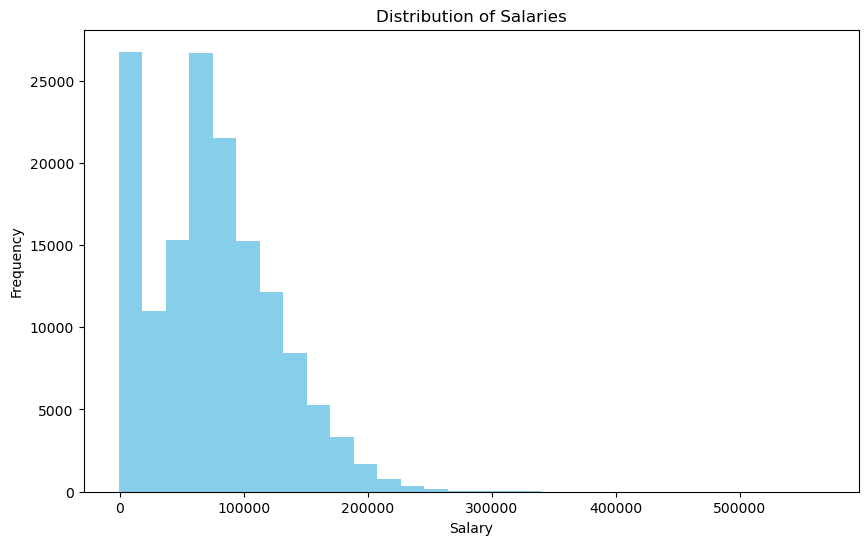

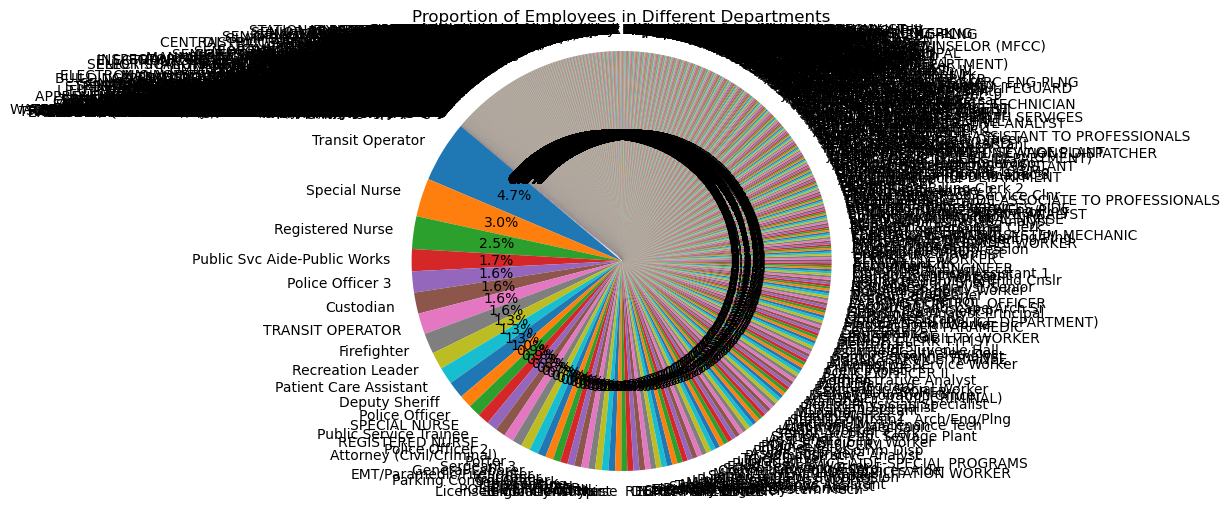

In [35]:
# Create a histogram to visualize the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=30, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Create a pie chart to represent the proportion of employees in different departments
department_counts = df['JobTitle'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index,
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Employees in Different Departments')
plt.show()

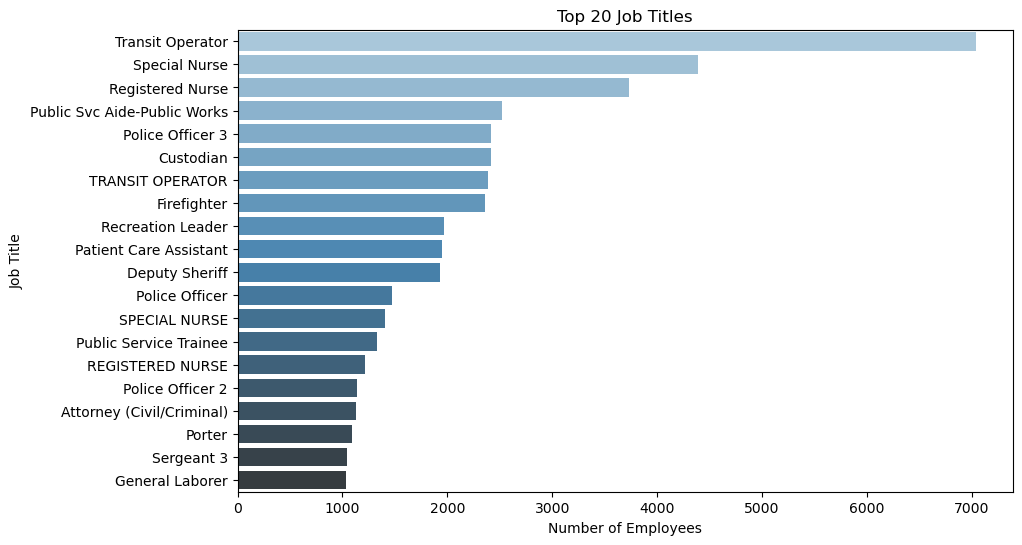

In [39]:
# Determine the top 20 job titles
top_10_job_titles = df['JobTitle'].value_counts().head(20)

# Create a bar chart to visualize the top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_job_titles.values,
            y=top_10_job_titles.index, palette="Blues_d")
plt.title('Top 20 Job Titles')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.show()

In [ ]:
# Determine the top 10 job titles
top_10_job_titles = df['JobTitle'].value_counts().head(10)

# Create a bar chart to visualize the top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_job_titles.values,
            y=top_10_job_titles.index, palette="Blues_d")
plt.title('Top 10 Job Titles')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.show()

# 5. Grouped Analysis


In [29]:
# Group the data by 'JobTitle' and calculate summary statistics for 'TotalPay'
grouped_data = df.groupby('JobTitle')['TotalPay'].describe()

# Print the summary statistics
display(grouped_data)

,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
ACCOUNT CLERK,83.0,44035.664337,13170.742908,614.00,42984.0100,49777.820,50401.8100,60838.20
ACCOUNTANT,5.0,47429.268000,27137.331315,1148.40,45304.3800,60076.240,65225.3100,65392.01
ACCOUNTANT INTERN,48.0,29031.742917,20711.322649,2981.53,9940.0000,17658.505,53789.8000,58799.53
"ACPO,JuvP, Juv Prob (SFERS)",1.0,62290.780000,NaN,62290.78,62290.7800,62290.780,62290.7800,62290.78
ACUPUNCTURIST,1.0,67594.400000,NaN,67594.40,67594.4000,67594.400,67594.4000,67594.40
...,...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,26.0,52705.880385,19760.943417,5343.69,51729.9150,60333.125,64305.2850,85077.40
X-Ray Laboratory Aide,100.0,50823.942700,24170.083004,1007.00,26919.2075,60047.290,68306.2425,99812.97
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1.0,53632.870000,NaN,53632.87,53632.8700,53632.870,53632.8700,53632.87


In [31]:
# Compare the average salaries across different job titles
average_salaries = df.groupby(
    'JobTitle')['TotalPay'].mean().sort_values(ascending=False)

# Print the average salaries
# print('\nAverage salaries across different job titles:')
display(average_salaries.reset_index())

,JobTitle,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
1,Chief Investment Officer,339653.700000
2,Chief of Police,329183.646667
3,"Chief, Fire Department",325971.683333
4,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
...,...,...
2154,"Commissioner 16.700c, No Pay",25.760000
2155,IS Technician Assistant,0.000000
2156,Not provided,0.000000
2157,Public Safety Comm Tech,0.000000


# 6. Simple Correlation Analysis


Correlations between TotalPay and other numerical columns:
Id                 -0.211478
Year                0.032090
OtherPay            0.470495
OvertimePay         0.504860
Benefits            0.773559
BasePay             0.950689
TotalPayBenefits    0.977313
TotalPay            1.000000
Name: TotalPay, dtype: float64


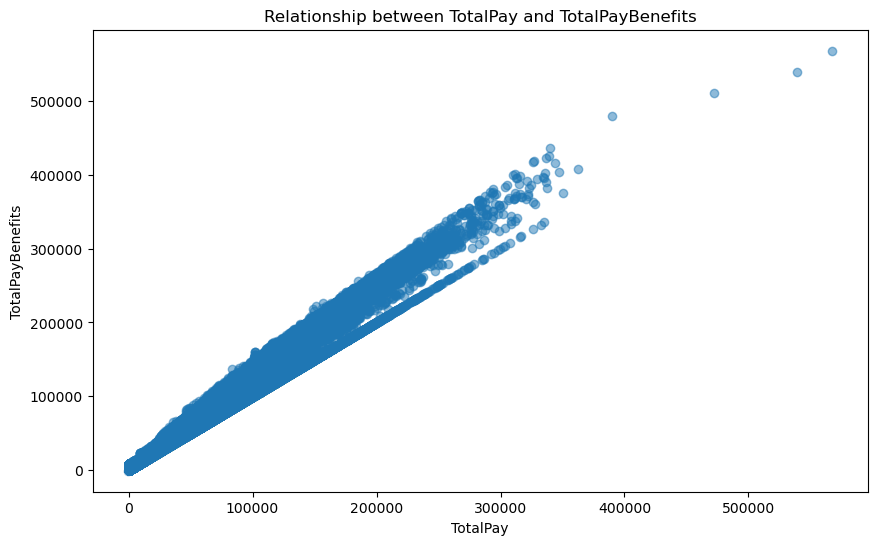

In [33]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation between 'TotalPay' and other numerical columns
correlations = numerical_df.corr()['TotalPay'].sort_values()

# Print the correlations
print('Correlations between TotalPay and other numerical columns:')
print(correlations)

# Plot a scatter plot to visualize the relationship between 'TotalPay' and 'TotalPayBenefits'
plt.figure(figsize=(10, 6))
plt.scatter(numerical_df['TotalPay'],
            numerical_df['TotalPayBenefits'], alpha=0.5)
plt.title('Relationship between TotalPay and TotalPayBenefits')
plt.xlabel('TotalPay')
plt.ylabel('TotalPayBenefits')
plt.show()

# 7. Summary of Insights


As an AI programming assistant, I can help you generate a structure for your summary of insights based on the tasks you've performed:

1. **Basic Data Exploration**: The dataset contains '148654' rows and '13' columns. The columns are of different data types: numerical, categorical, etc. There were missing values in some columns which were handled in the data cleaning process.

2. **Descriptive Statistics**: The average salary is '74768.32197169267', with a median of '71426.60999999999'. The range of salaries is from '618.13' to '567595.43', with a standard deviation of '50517.005273949944'.

3. **Data Cleaning**: Missing data was handled by dropping columns with more than 50% missing values and filling other missing values with the median for numerical columns and mode for categorical columns.

4. **Basic Data Visualization**: The histogram of salaries showed a certain distribution (e.g., normal, skewed, etc.). The pie chart showed that the largest proportion of employees work in 'Department Transit Operator'.

5. **Grouped Analysis**: The summary statistics showed differences in pay across different job titles. The job title with the highest average salary is 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'.

6. **Simple Correlation Analysis**: There is a strong positive correlation between 'TotalPay' and 'TotalPayBenefits'. The scatter plot visualizes this relationship.
